# Imports
***

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re 
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
***
Import and Examine Dataset

In [3]:
df = pd.read_csv('clean_nus_sms.csv', index_col=0)
df.head()

,id,Message,length,country,Date
0,10120,Bugis oso near wat...,21,SG,2003/4
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4
4,10124,Meet after lunch la...,22,SG,2003/4


In [4]:
# View DataFrame shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48598 entries, 0 to 55834
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       48598 non-null  int64 
 1   Message  48595 non-null  object
 2   length   48598 non-null  object
 3   country  48598 non-null  object
 4   Date     48598 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


Comments on the DataFrame:

* 48,598 messages present in the DataFrame. 
* All of the values in the DataFrame are strings, except for the `id` variable.
* The variable `Message`  has 3 fewer values than the other variables >> must be addressed later on. 

#### Remove Empty Messages

In [5]:
#Remove empty messages
df = df.dropna()
len(df)

48595

#### Convert to Lower Case

In [6]:
# Set all characters to lower case in Message
df["Message_clean"] = df["Message"].str.lower()
# View changes
df.head()

,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat...
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,"go until jurong point, crazy.. available only ..."
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when... lets go learn pilates...
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price... haiz......
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la...


#### Remove Punctuation

In [7]:
# Remove punctiation from Message variable
df["Message_clean"] = df["Message_clean"].str.replace('[^\w\s]','')
# View changes
df.head()

,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat...
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,"go until jurong point, crazy.. available only ..."
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when... lets go learn pilates...
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price... haiz......
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la...


#### Remove stopwords

In [8]:
# View stopwords in english
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

#### Remove URLs

In [9]:
# Create a function to remove url from Message data
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

# Remove URLs from Message data
df["Message_clean"] = df["Message_clean"].apply(lambda text: remove_urls(text))
# View changes
df.head()

,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat...
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,"go until jurong point, crazy.. available only ..."
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when... lets go learn pilates...
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price... haiz......
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la...


#### Remove HTMLs

In [10]:
# Create a function to remove HTML Tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)
# Remove HTML from Message data
df["Message_clean"] = df["Message_clean"].apply(lambda text: remove_html(text))
# View changes
df.head()

,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat...
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,"go until jurong point, crazy.. available only ..."
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when... lets go learn pilates...
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price... haiz......
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la...


#### Tokenize cleaned messages

In [11]:
nltk.download('punkt')
# Tokenize cleaned messages
df['Message_tokenized'] = df.apply(lambda x: nltk.word_tokenize(x['Message_clean']), axis=1)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/andrealoizidou/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id,Message,length,country,Date,Message_clean,Message_tokenized
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat...,"[bugis, oso, near, wat, ...]"
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy, .., avail..."
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when... lets go learn pilates...,"[i, dunno, until, when, ..., lets, go, learn, ..."
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price... haiz......,"[den, only, weekdays, got, special, price, ......"
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la...,"[meet, after, lunch, la, ...]"


In [12]:
# Save the preprocessed DataFrame
df.to_csv('processed_clean_nus_sms.csv', header = True)

# Exploratory Data Analysis
***


In [13]:
# Count the number of unique countries
df['country'].nunique()

40

In [14]:
# View message count by country
df['country'].value_counts()

country
Singapore              22013
SG                      9804
India                   6901
United States           3749
USA                     1931
Sri Lanka               1017
Malaysia                 766
Pakistan                 751
unknown                  602
Canada                   198
Bangladesh               126
China                    107
india                    105
INDIA                     79
Philippines               67
Indonesia                 48
Nepal                     39
srilanka                  30
United Kingdom            30
Hungary                   28
Serbia                    22
Kenya                     20
Ghana                     18
Italia                    10
Turkey                    10
Trinidad and Tobago       10
Lebanon                   10
Slovenia                  10
Nigeria                   10
New Zealand               10
Macedonia                 10
UK                        10
Morocco                    9
Romania                    9
Austra

In [15]:
# Correct values
df = df.replace({'country':{'SG':'Singapore', 
                            'USA':'United States',
                            'india':'India',
                            'INDIA':'India',
                            'srilanka':'Sri Lanka',
                            'UK':'United Kingdom',
                            'BARBADOS':'Barbados',
                            'jamaica':'Jamaica',
                            'MY':'Malaysia',
                            'unknown':'Unknown'}})
#count the real number of unique countries
df['country'].nunique()

33

In [16]:
# View message count by country
df['country'].value_counts()

country
Singapore              31817
India                   7085
United States           5680
Sri Lanka               1047
Malaysia                 767
Pakistan                 751
Unknown                  602
Canada                   198
Bangladesh               126
China                    107
Philippines               67
Indonesia                 48
United Kingdom            40
Nepal                     39
Hungary                   28
Serbia                    22
Kenya                     20
Ghana                     18
Italia                    10
Trinidad and Tobago       10
Lebanon                   10
Turkey                    10
Nigeria                   10
New Zealand               10
Slovenia                  10
Macedonia                 10
Morocco                    9
Australia                  9
Romania                    9
Jamaica                    8
Barbados                   8
Spain                      5
France                     5
Name: count, dtype: int64

<Axes: xlabel='country'>

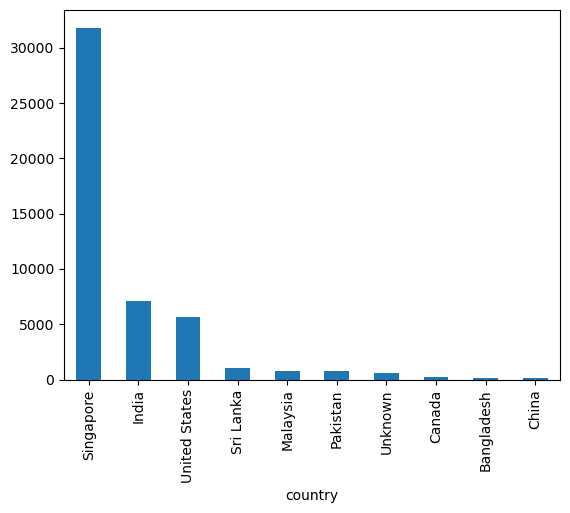

In [17]:
# Number of messages per country
country_value_counts = df['country'].value_counts() 

# Number of messages per country for the top 10 most active countries
top_10_country_value_counts = country_value_counts.head(10) 

# Plot a bar chart using pandas built-in plotting apis
top_10_country_value_counts.plot.bar() 

# Sentiment Analysis
***

In [18]:
# Download twitter data and sentiment analysis model
nltk.download('twitter_samples')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/andrealoizidou/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/andrealoizidou/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/andrealoizidou/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

NLTK's Twitter corpus currently contains a sample of 20k Tweets (named 'twitter_samples') retrieved from the Twitter Streaming API, together with another 10k which are divided according to sentiment into negative and positive. >> https://www.nltk.org/howto/twitter.html

In [19]:
# import the twitter data
from nltk.corpus import twitter_samples

In [20]:
# Instantiate positive tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
# Instantiate negative tweets
negative_tweets = twitter_samples.strings('negative_tweets.json')

#### Distribution of Positive and Negative Tweets

In [21]:
# View fifth positive tweet
print(positive_tweets[4])
# View number of positive tweets
print('There are {} positive tweets.'.format(len(positive_tweets)))

yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days
There are 5000 positive tweets.


In [22]:
# View fifth negative tweet
print(negative_tweets[4])
# View number of negative tweets
print('There are {} negative tweets.'.format(len(negative_tweets)))

Dang starting next week I have "work" :(
There are 5000 negative tweets.


#### Tokenizing Positive and Negative Tweets

In [23]:
# Create tokens from the positive tweets
pos_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
# Show the first tokenized tweet
print(pos_tweet_tokens[6])

# Create tokens from the positive tweets
neg_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')
# Show the first tokenized tweet
print(neg_tweet_tokens[4])

['We', "don't", 'like', 'to', 'keep', 'our', 'lovely', 'customers', 'waiting', 'for', 'long', '!', 'We', 'hope', 'you', 'enjoy', '!', 'Happy', 'Friday', '!', '-', 'LWWF', ':)', 'https://t.co/smyYriipxI']
['Dang', 'starting', 'next', 'week', 'I', 'have', '"', 'work', '"', ':(']


#### Removing the HTML
We are removing the HTML because we did the same for the SMS data

In [24]:
# Define lists for preprocessed tokens
positive_cleaned_tweets_list = []
negative_cleaned_tweets_list = []

# Positive tokens
for tweet in pos_tweet_tokens:
    cleaned_tweet = []
    for token in tweet:
        # Remove URLs
        url_cleaned = remove_urls(token)
        # Remove HTML 
        html_cleaned = remove_html(url_cleaned)
        cleaned_tweet.append(html_cleaned)
    # Add to list
    positive_cleaned_tweets_list.append(cleaned_tweet)

# Negative tokens
for tweet in neg_tweet_tokens:
    cleaned_tweet = []
    for token in tweet:
        # Remove URLs
        url_cleaned = remove_urls(token)
        # Remove HTML 
        html_cleaned = remove_html(url_cleaned)
        cleaned_tweet.append(html_cleaned)
    # Add to list
    negative_cleaned_tweets_list.append(cleaned_tweet)

# Print preprocessed token lists
print(positive_cleaned_tweets_list[:5])
print(negative_cleaned_tweets_list[:5])

[['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)'], ['@Lamb2ja', 'Hey', 'James', '!', 'How', 'odd', ':/', 'Please', 'call', 'our', 'Contact', 'Centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'Many', 'thanks', '!'], ['@DespiteOfficial', 'we', 'had', 'a', 'listen', 'last', 'night', ':)', 'As', 'You', 'Bleed', 'is', 'an', 'amazing', 'track', '.', 'When', 'are', 'you', 'in', 'Scotland', '?', '!'], ['@97sides', 'CONGRATS', ':)'], ['yeaaaah', 'yippppy', '!', '!', '!', 'my', 'accnt', 'verified', 'rqst', 'has', 'succeed', 'got', 'a', 'blue', 'tick', 'mark', 'on', 'my', 'fb', 'profile', ':)', 'in', '15', 'days']]
[['hopeless', 'for', 'tmr', ':('], ['Everything', 'in', 'the', 'kids', 'section', 'of', 'IKEA', 'is', 'so', 'cute', '.', 'Shame', "I'm", 'nearly', '19', 'in', '2', 'months', ':('], ['@Hegelbon', 'That', 'heart', 'sliding', 'into', 'th

#### Classifier Feature Selection
We will select the most common words in my corpus as the indicators of something positive or negative

In [25]:
#create a list of all the tweets
list_of_all_tweets = positive_cleaned_tweets_list + negative_cleaned_tweets_list

#turn my list of lists into a flat list of tokens
all_tweet_tokens = [token for sublist in list_of_all_tweets for token in sublist]

#check how many words that is
print("length of all tweets is {}". format(len(all_tweet_tokens)))

#create a frequency distribution of all the words.
all_tokens = nltk.FreqDist(token for token in all_tweet_tokens)

#inspect the result
print("Length of all the tokens is {}".format(len(all_tokens)))
print("10 Most Common Tokens are {}".format(all_tokens.most_common(10)))

#select the top 10,000 words to be our features
sentiment_features = [word for (word, freq) in all_tokens.most_common(10000)]

#check what this list looks like
sentiment_features[:5]

length of all tweets is 130052
Length of all the tokens is 22690
10 Most Common Tokens are [(':(', 4586), (':)', 3693), ('!', 2675), ('I', 2477), ('.', 2433), ('to', 2133), ('you', 2001), ('the', 1845), ('', 1753), (',', 1698)]


[':(', ':)', '!', 'I', '.']

In [39]:
def document_features(document, sentiment_features):
    #make a set list of all the tokens in a message
    document_tokens = set(document)
    features = {}
    #for all my features, check if that feature is in my target message
    for token in sentiment_features:
        #make a dictionary for each message 
        features[token] = (token in document_tokens)
    return features

# #test it on a sample sentence
# test_sentence = " The NLP class at FIU is fun! :)".split(" ")
# print(document_features(test_sentence, sentiment_features))

#### Splitting Data, 70% Training set, 30% Test Set
Tweets are randomly selected

In [27]:
# Import random library
import random

# Create positive and negative datasets from my lists of tokenized tweets
positive_tw = [(tweet, "Positive") for tweet in positive_cleaned_tweets_list]
negative_tw = [(tweet, "Negative") for tweet in negative_cleaned_tweets_list]

# Create the combined dataset
all_labeled_tweets = positive_tw + negative_tw

#initialize the random number so I get the same result every time
random.seed(42)
# Shuffle the order of the dataset NOTE that the random method applies in place
random.shuffle(all_labeled_tweets)

#create a list of (token, sentiment) pairs for all the features in the tweets
feature_set = [(document_features(d, sentiment_features),c) for (d,c) in all_labeled_tweets]
# Separate the dataset into the training and testing sets
train_set, test_set = feature_set[:7000], feature_set[7000:]

#### Naive Bayes Classifier

In [28]:
# Import classify and sentiment analysis model
from nltk import classify
from nltk import NaiveBayesClassifier

# Instantiate a classifier and train on training data 
classifier = nltk.NaiveBayesClassifier.train(train_set)

# Evaluate the model with classify() function
print("Accuracy is:", classify.accuracy(classifier, test_set))

#Show the 20 most informative features for prediction
print(classifier.show_most_informative_features(20))

Accuracy is: 0.9963333333333333
Most Informative Features
                      :( = True           Negati : Positi =   2060.9 : 1.0
                      :) = True           Positi : Negati =   1649.1 : 1.0
                    miss = True           Negati : Positi =     31.1 : 1.0
                     See = True           Positi : Negati =     29.3 : 1.0
                     sad = True           Negati : Positi =     23.6 : 1.0
                  THANKS = True           Negati : Positi =     22.6 : 1.0
                  FOLLOW = True           Negati : Positi =     21.9 : 1.0
                  Thanks = True           Positi : Negati =     21.1 : 1.0
                     x15 = True           Negati : Positi =     19.9 : 1.0
                 arrived = True           Positi : Negati =     17.6 : 1.0
                 welcome = True           Positi : Negati =     17.2 : 1.0
                   Thank = True           Positi : Negati =     17.0 : 1.0
                     TOO = True           

In [29]:
# Select one sample message to evaluate
sample_message = str(df["Message_tokenized"][6])
print(sample_message)

# Print prediction of sentiment
print(classifier.classify(dict([token, True] for token in sample_message)))

['5', 'nights', '...', 'we', 'nt', 'staying', 'at', 'port', 'step', 'liao', '...', 'too', 'ex']
Negative


In [30]:
# # Loop through each message to find the first positive message
# for i, message in enumerate(df["Message_tokenized"]):
#     # Predict sentiment for the current message
#     sentiment_prediction = classifier.classify(dict([token, True] for token in message))
    
#     # Print the sentiment prediction for debugging
#     print("Message", i+1, "Sentiment Prediction:", sentiment_prediction)
    
#     # Check if the sentiment prediction is positive
#     if sentiment_prediction == 'positive':
#         print("First positive message found at index", i+1)
#         print("Predicted Sentiment:", sentiment_prediction)
#         print("Message:", message)
#         break  # Exit the loop once the first positive message is found


#### Distribution of Sentiments

In [31]:
 # Create an empty list
sentiments = []

# Iterate through the column and predict each response's sentiment, append 
# sentiment to new list
for message in df['Message_tokenized']:
    sentiments.append(str((classifier.classify(dict([token, True] for token in message)))))

# add the list back to our DataFrame
df['Sentiment'] = sentiments

df['Sentiment'].value_counts()

Sentiment
Negative    28481
Positive    20114
Name: count, dtype: int64

In [32]:
# View the proportion of the corpus in each class
df['Sentiment'].value_counts(normalize = True)

Sentiment
Negative    0.586089
Positive    0.413911
Name: proportion, dtype: float64

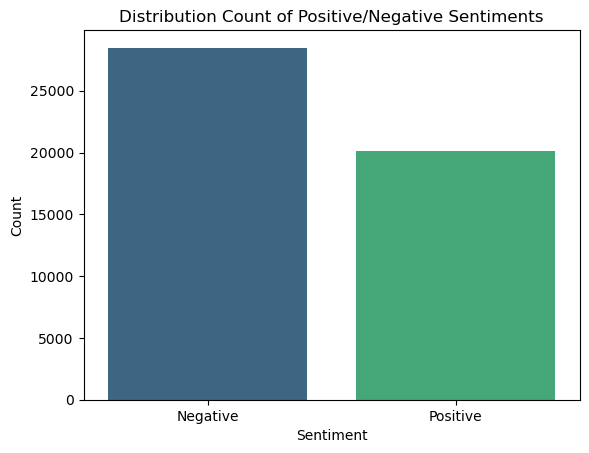

In [33]:
# View distribution in a countplot
sns.countplot(x='Sentiment', data=df,  palette='viridis')
# Add title and labels
plt.title('Distribution Count of Positive/Negative Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the plot
plt.show()

#### Sentiment Conversion into Binary
-1: Negative
1: Positive


In [34]:
# Define a function to convert sentiment into binary values
def convert_sentiment(sentiment):
    """
    Takes in sentiments, and converts them to binary values.
    """
    if sentiment == 'Positive':
        return 1
    else:
        return -1

# Create new feature based on the values returned from function
df['Sentiment_score'] = df['Sentiment'].apply(convert_sentiment)

#check 
df.head(10)

,id,Message,length,country,Date,Message_clean,Message_tokenized,Sentiment,Sentiment_score
0,10120,Bugis oso near wat...,21,Singapore,2003/4,bugis oso near wat...,"[bugis, oso, near, wat, ...]",Negative,-1
1,10121,"Go until jurong point, crazy.. Available only ...",111,Singapore,2003/4,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy, .., avail...",Negative,-1
2,10122,I dunno until when... Lets go learn pilates...,46,Singapore,2003/4,i dunno until when... lets go learn pilates...,"[i, dunno, until, when, ..., lets, go, learn, ...",Negative,-1
3,10123,Den only weekdays got special price... Haiz......,140,Singapore,2003/4,den only weekdays got special price... haiz......,"[den, only, weekdays, got, special, price, ......",Negative,-1
4,10124,Meet after lunch la...,22,Singapore,2003/4,meet after lunch la...,"[meet, after, lunch, la, ...]",Negative,-1
5,10125,m walking in citylink now ü faster come down.....,65,Singapore,2003/4,m walking in citylink now ü faster come down.....,"[m, walking, in, citylink, now, ü, faster, com...",Positive,1
6,10126,5 nights...We nt staying at port step liao...T...,51,Singapore,2003/4,5 nights...we nt staying at port step liao...t...,"[5, nights, ..., we, nt, staying, at, port, st...",Positive,1
7,10127,Hey pple...$700 or $900 for 5 nights...Excelle...,81,Singapore,2003/4,hey pple...$700 or $900 for 5 nights...excelle...,"[hey, pple, ..., $, 700, or, $, 900, for, 5, n...",Positive,1
8,10128,Yun ah.the ubi one say if ü wan call by tomorr...,160,Singapore,2003/4,yun ah.the ubi one say if ü wan call by tomorr...,"[yun, ah.the, ubi, one, say, if, ü, wan, call,...",Positive,1
9,10129,Hey tmr maybe can meet you at yck,33,Singapore,2003/4,hey tmr maybe can meet you at yck,"[hey, tmr, maybe, can, meet, you, at, yck]",Negative,-1


#### Average Sentiment Score/per Country

In [35]:
# Select numeric columns for aggregation
numeric_cols = df.select_dtypes(include='number').columns

# Create a new dataframe grouped by countries and aggregated by the mean for numeric columns
df_sent = df.groupby(['country'])[numeric_cols].mean()

# Reset the index
df_sent.reset_index(inplace=True)

df_sent.head()


,country,id,Sentiment_score
0,Australia,45574.666667,0.333333
1,Bangladesh,39876.301587,-0.031746
2,Barbados,45633.500000,-1.000000
3,Canada,5763.035354,-0.161616
4,China,12499.878505,0.028037


In [36]:
# Sort DataFrame by Sentiment_score
df_sent.sort_values(by='Sentiment_score') 

,country,id,Sentiment_score
2,Barbados,45633.500000,-1.000000
13,Lebanon,41975.500000,-0.600000
19,Nigeria,41682.500000,-0.600000
29,Turkey,45643.500000,-0.600000
22,Romania,41232.000000,-0.555556
11,Jamaica,45285.250000,-0.500000
10,Italia,45593.500000,-0.400000
24,Singapore,23200.872835,-0.263287
25,Slovenia,41282.500000,-0.200000
14,Macedonia,28552.500000,-0.200000


<Axes: xlabel='country', ylabel='Sentiment_score'>

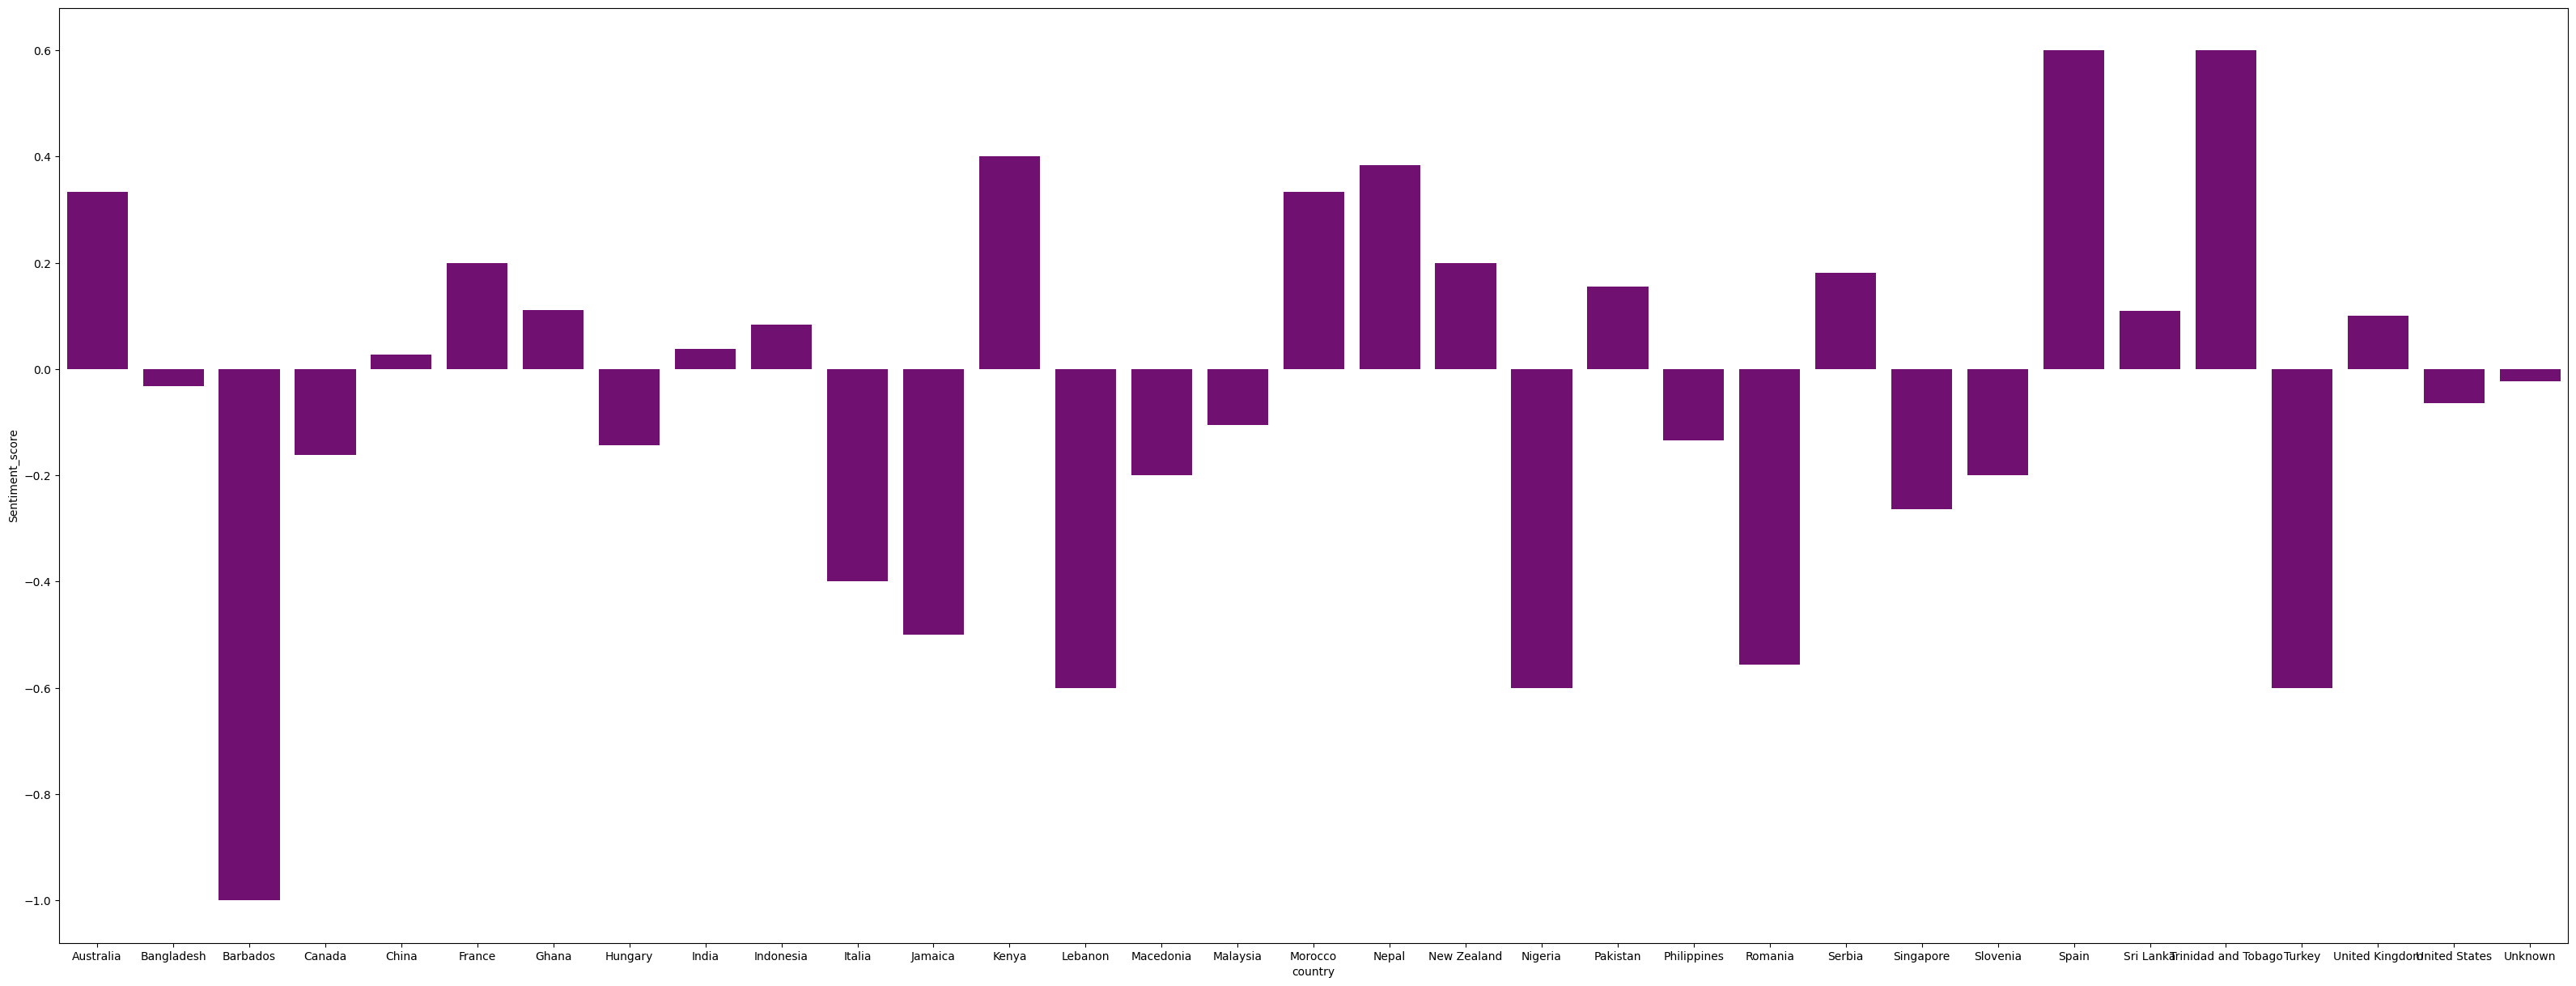

In [37]:
 # Plot general sentiments
fig, ax = plt.subplots(figsize=(40,15))
sns.barplot(x='country', y='Sentiment_score', data=df_sent, ax=ax,
                 color="purple")

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Extracting actual labels from the test set
actual_labels = [label for _, label in test_set]


# Using the classifier to predict labels for each feature set in the test set
predicted_labels = [classifier.classify(features) for features, _ in test_set]

# Now, actual_labels and predicted_labels can be compared directly



# Assuming you're treating "Positive" as the positive class (binary classification)
# You may need to adjust based on how sklearn expects your labels (as strings or numeric)
precision = precision_score(actual_labels, predicted_labels, pos_label="Positive", average='binary')
recall = recall_score(actual_labels, predicted_labels, pos_label="Positive", average='binary')
f1 = f1_score(actual_labels, predicted_labels, pos_label="Positive", average='binary')
accuracy = accuracy_score(actual_labels, predicted_labels)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.9963333333333333
Precision: 0.9979647218453188
Recall: 0.9945909398242055
F1 Score: 0.9962749746020995
